<a href="https://colab.research.google.com/github/SelvamathanS/BiLstm/blob/main/BiLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Importing Data (MNIST)***

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import  Input, Model
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, LSTM, Concatenate

In [ ]:
(x_train, y_train),(x_test, y_test) = keras.datasets.fashion_mnist.load_data()

#preprocessing (normalizing(0 to 1) and reshaping the data too 3d for lstm only accepts the image data in 3d format)
train_images = x_train.reshape((x_train.shape[0],28,28)).astype('float32')/255
test_images = x_test.reshape((x_test.shape[0],28,28)).astype('float32')/255

#one hot encoding for easily calculating losses
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

# ***Model training***

In [ ]:
#it is called functional api (withoit using sequencial model)
input_shape=(28,28)
inputs = Input(shape = input_shape)

forward_lstm = LSTM(128,return_sequences=False)(inputs)  # No intermediate steps
backward_lstm = LSTM(128,return_sequences=False, go_backwards=True)(inputs)
rnn_layer = Concatenate()([forward_lstm,backward_lstm])

outputs = Dense(10,activation = 'softmax')(rnn_layer)
model = Model(inputs=inputs,outputs=outputs)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 128)       │     80,384 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ (None, 128)       │     80,384 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 256)       │          0 │ lstm_2[0][0],     │
│ (Concatenate)       │                   │            │ lstm_3[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 10)        │      2,570 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 163,338 (638.04 KB)

 Trainable params: 163,338 (638.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 129s 66ms/step - accuracy: 0.7323 - loss: 0.7169 - val_accuracy: 0.8440 - val_loss: 0.4269
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 120s 64ms/step - accuracy: 0.8549 - loss: 0.3945 - val_accuracy: 0.8569 - val_loss: 0.3903
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 116s 62ms/step - accuracy: 0.8739 - loss: 0.3427 - val_accuracy: 0.8753 - val_loss: 0.3382
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 116s 62ms/step - accuracy: 0.8842 - loss: 0.3057 - val_accuracy: 0.8748 - val_loss: 0.3362
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 116s 62ms/step - accuracy: 0.8947 - loss: 0.2864 - val_accuracy: 0.8794 - val_loss: 0.3344


## ***Evaluation***

In [ ]:
loss,accuracy = model.evaluate(test_images,test_labels)
print("Loss: " , loss)
print("Accuracy : ", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.8795 - loss: 0.3417
Loss:  0.3343948423862457
Accuracy :  0.8794000148773193


# ***Visualization***

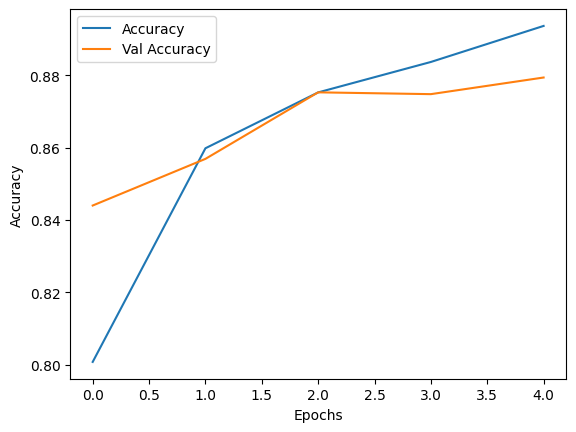

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

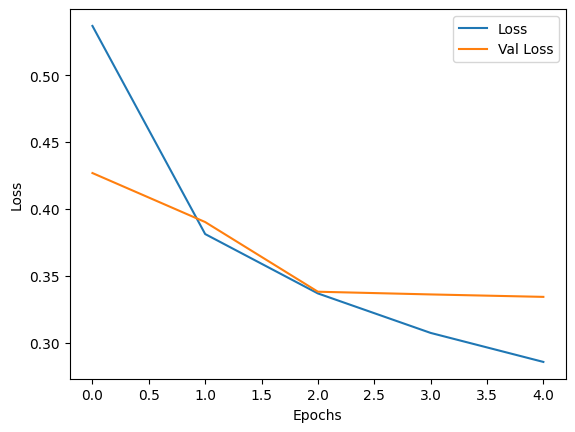

In [ ]:
plt.plot(history.history['loss'], label = 'Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# ***Prediction***

In [ ]:
y_pred = model.predict(test_images[0:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


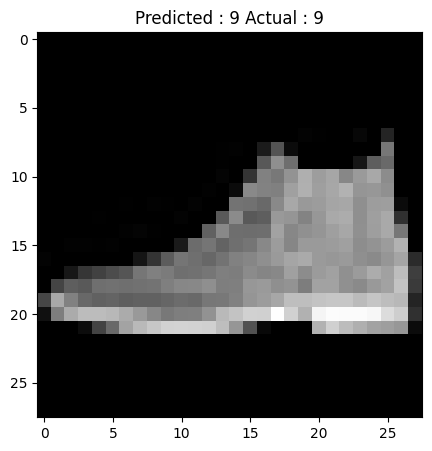

In [ ]:
import numpy as np
class_names = [str(i) for i in range(10)]
y_pred1=np.argmax(y_pred,axis=1)

image_index = 0 # Consistent index for prediction and display

plt.figure(figsize=(5,5))
plt.imshow(x_test[image_index],cmap='gray')

predicted_label = y_pred1[0] # Prediction for the first image (index 0)
actual_label = y_test[image_index] # Actual label for the first image (index 0)

plt.title(f'Predicted : {class_names[predicted_label]} Actual : {class_names[actual_label]}')
plt.show()